In [1]:
import sys

sys.path.append("../src")

import copy

from nat2324.algorithms.gp import GeneticProgrammingAlgorithm
from nat2324.utils.gp.non_terminals import (
    Arithmetic,
    Indexable,
    Flow,
)

from nat2324.utils import Symbol, Terminal, GPTree
from nat2324.problems import Sequence
from nat2324.utils import run_optimization_experiment, visualize_optimization_experiments

%load_ext autoreload
%autoreload 2

In [96]:
# Define possible non-terminals
NON_TERMINALS = Symbol.validate_ps([
    Arithmetic.add(),
    Arithmetic.mul(),
    Arithmetic.div(),
    Indexable.get(),
    Indexable.push(),
    Flow.for_loop(),
])

# Define possible terminals
TERMINALS = Symbol.validate_ps([
    Terminal(-3),
    Terminal(-2),
    Terminal(-1),
    Terminal(0),
    Terminal(1),
    Terminal(2),
    Terminal(3),
    Terminal("s"),
    Terminal("x"),
])

# Sequence arguments
NUM_SAMPLES = 10
SAMPLE_RANGE = (5, 18)
TRAIN_FRAC = 0.8
SEED = 0

# Sequence kwargs
SEQUENCE_KWARGS = {
    "num_samples": NUM_SAMPLES,
    "sample_range": SAMPLE_RANGE,
    "train_frac": TRAIN_FRAC,
    "seed": SEED,
}

In [ ]:
tree = GPTree.generate_tree(
    min_depth=2,
    max_depth=5,
    non_terminals=NON_TERMINALS,
    terminals=TERMINALS,
)


fibonacci_tree(s=[0, 1], x=9)

In [3]:
# Define 4 possible sequences to experiment with
fibonacci = Sequence("fibonacci", **SEQUENCE_KWARGS)
tribonacci = Sequence("tribonacci", **SEQUENCE_KWARGS)
pell = Sequence("pell", **SEQUENCE_KWARGS)
arithmetic_geometric = Sequence("arithmetic_geometric", **SEQUENCE_KWARGS)

In [ ]:
def experiment_callback(*args, **kwargs):
    k = kwargs.pop("K", 7)
    high = kwargs.pop("high", 9)
    evaluation_type = kwargs.pop("evaluation_type", "row_col")

    sumplete = Sumplete(K=k, evaluation_type=evaluation_type, low=1, high=high)
    kwargs["fitness_fn"] = sumplete
    kwargs['D'] = k ** 2
    
    return GeneticProgrammingAlgorithm.experiment_callback(*args, **kwargs)

## Question (b)

### Depth

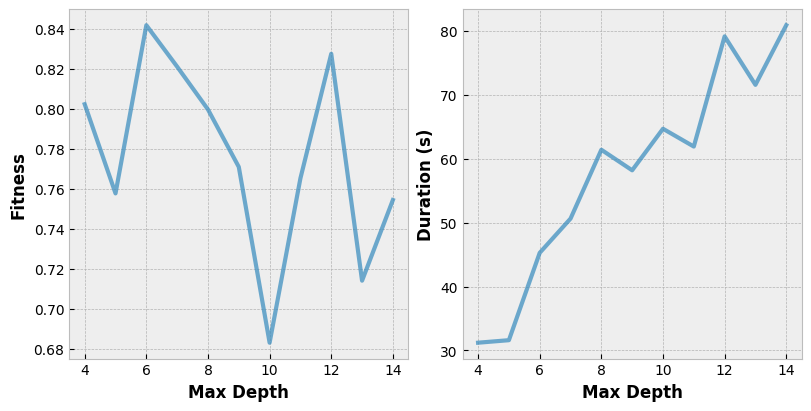

In [9]:
# Setup variable params
experiment_setup  = {
    "max_depth": [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
}

# Setup static params
default_kwargs = {
    "fitness_fn": fibonacci,
    "terminals": TERMINALS,
    "non_terminals": NON_TERMINALS,
    "max_generations": 50,
    "returnable": ("score", "num_generations", "duration"),
    "best_score": 1,
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    GeneticProgrammingAlgorithm.experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=30,
    dirname="../experiments/problem3/runs",
)

# Visualize the results
visualize_optimization_experiments(
    xs={"Max Depth": experiment_setup["max_depth"]},
    ys={"Fitness": results["max_depth"][:, 0:1],
        "Duration": results["max_depth"][:, 2:3]},
    labels=["Fitness", "Duration (s)"],
    titles=[],
    filepath="../experiments/problem3/plots/depth.png",
)

In [12]:
# Initialize GP with a maximum tree depth of 4
gp_max_depth_4 = GeneticProgrammingAlgorithm(
    fitness_fn=fibonacci.evaluate,
    max_depth=4,
    terminals=TERMINALS,
    non_terminals=NON_TERMINALS,
    seed=SEED,
)

# Run the GP algorithm to find a solution
solution = gp_max_depth_4.run(
    max_generations=50,
    best_score=1,
    patience=None,
)

# Visualize the solution
solution.show()
solution.export("../experiments/problem3/plots/depth4.png")

Current best N/A:   0%|          | 0/49 [00:00<?, ?it/s]

for
├── x
└── push
    ├── s
    └── +
        ├── get
        │   ├── s
        │   └── x
        └── get
            ├── s
            └── -2


In [16]:
# Initialize GP with a maximum tree depth of 10
gp_max_depth_10 = GeneticProgrammingAlgorithm(
    fitness_fn=fibonacci.evaluate,
    max_depth=10,
    terminals=TERMINALS,
    non_terminals=NON_TERMINALS,
    seed=SEED,
)

# Run the GP algorithm to find a solution
solution = gp_max_depth_10.run(
    max_generations=50,
    best_score=1,
    patience=None,
)

# Visualize the solution
solution.show()
solution.export("../experiments/problem3/plots/depth10.png")

Current best N/A:   0%|          | 0/49 [00:00<?, ?it/s]

for
├── +
│   ├── push
│   │   ├── *
│   │   │   ├── for
│   │   │   │   ├── 0
│   │   │   │   └── x
│   │   │   └── for
│   │   │       ├── push
│   │   │       │   ├── x
│   │   │       │   └── +
│   │   │       │       ├── -1
│   │   │       │       └── x
│   │   │       └── 0
│   │   └── s
│   └── x
└── push
    ├── s
    └── +
        ├── get
        │   ├── s
        │   └── +
        │       ├── push
        │       │   ├── -2
        │       │   └── 1
        │       └── +
        │           ├── -1
        │           └── *
        │               ├── for
        │               │   ├── 0
        │               │   └── x
        │               └── for
        │                   ├── push
        │                   │   ├── x
        │                   │   └── get
        │                   │       ├── -1
        │                   │       └── x
        │                   └── 0
        └── for
            ├── 0
            └── get
                ├── s
                └──

### Symbols

In [40]:
# Define necessary non-terminals
BASE_NON_TERMINALS = [
    Indexable.get(),
    Indexable.push(),
    Flow.for_loop(),
    Arithmetic.add(),
]

# Define necessary terminals
BASE_TERMINALS = [
    Terminal(-2),
    Terminal(-1),
    Terminal("s"),
    Terminal("x"),
]

# Define possible extra groups of non-terminals and terminals
EXTRA_GROUPS = [
    {"non_terminal": Arithmetic.sub(), "terminals": [Terminal(1), Terminal(2)]},
    {"non_terminal": Arithmetic.mul(), "terminals": [Terminal(-3), Terminal(3)]},
    {"non_terminal": Arithmetic.div(), "terminals": [Terminal(-4), Terminal(4)]},
    {"non_terminal": Arithmetic.mod(), "terminals": [Terminal(-5), Terminal(5)]},
]

def generate_symbols(num_extra_symbol_groups=0):
    terminals = copy.deepcopy(BASE_TERMINALS)
    non_terminals = copy.deepcopy(BASE_NON_TERMINALS)

    for i in range(num_extra_symbol_groups):
        # Add the extra terminals and non-terminals
        terminals.extend(EXTRA_GROUPS[i]["terminals"])
        non_terminals.append(EXTRA_GROUPS[i]["non_terminal"])

    # Validate the terminals and non-terminals
    terminals = Symbol.validate_ps(terminals)
    non_terminals = Symbol.validate_ps(non_terminals)

    return terminals, non_terminals

def experiment_callback(*args, **kwargs):
    # Get the necessary kwargs and initialize terminals and non-terminals
    num_extra_symbol_groups = kwargs.pop("num_extra_symbol_groups", 0)
    terminals, non_terminals = generate_symbols(num_extra_symbol_groups)
    
    # Assign terminals and non-terminals to kwargs
    kwargs["terminals"] = terminals
    kwargs["non_terminals"] = non_terminals
    
    return GeneticProgrammingAlgorithm.experiment_callback(*args, **kwargs)

  0%|          | 0/5 [00:00<?, ?it/s]

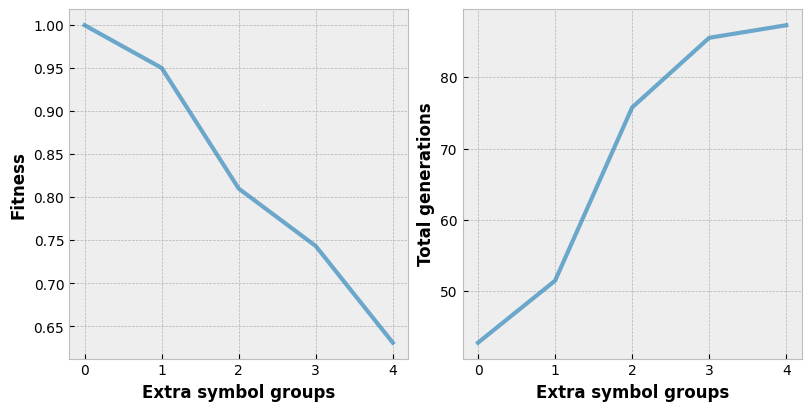

In [62]:
# Setup variable params
experiment_setup  = {
    "num_extra_symbol_groups": list(range(len(EXTRA_GROUPS) + 1)),
}

# Setup static params
default_kwargs = {
    "fitness_fn": fibonacci,
    "max_depth": 5,
    "tournament_size": 3,
    "p_m": 0.2,
    "max_generations": 150,
    "returnable": ("score", "num_generations", "duration"),
    "best_score": 1,
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=30,
    dirname="../experiments/problem3/runs",
)

# Visualize the results
visualize_optimization_experiments(
    xs={"Extra symbol groups": experiment_setup["num_extra_symbol_groups"]},
    ys={"Fitness": results["num_extra_symbol_groups"][:, 0:1],
        "Generations": results["num_extra_symbol_groups"][:, 1:2]},
    labels=["Fitness", "Total generations"],
    titles=[],
    filepath="../experiments/problem3/plots/symbols.png",
)

In [58]:
# Get the necessary kwargs and initialize terminals and non-terminals
terminals, non_terminals = generate_symbols(num_extra_symbol_groups=0)

# Initialize the GP algorithm with no extra groups
gp_extra_groups_0 = GeneticProgrammingAlgorithm(
    fitness_fn=fibonacci.evaluate,
    max_depth=5,
    terminals=terminals,
    non_terminals=non_terminals,
    tournament_size=3,
    p_m=0.2,
    seed=SEED,
)

# Run the GP algorithm to find a solution and visualize it
solution = gp_extra_groups_0.run(max_generations=100, patience=None, best_score=1)
solution.show()
solution.export("../experiments/problem3/plots/symbols0.png")

Current best N/A:   0%|          | 0/99 [00:00<?, ?it/s]

for
├── +
│   ├── x
│   └── push
│       ├── x
│       └── +
│           ├── x
│           └── s
└── push
    ├── s
    └── +
        ├── get
        │   ├── s
        │   └── -1
        └── for
            ├── -2
            └── get
                ├── s
                └── -2


In [60]:
# Get the necessary kwargs and initialize terminals and non-terminals
terminals, non_terminals = generate_symbols(num_extra_symbol_groups=4)

# Initialize the GP algorithm with 4 extra groups
gp_extra_groups_4 = GeneticProgrammingAlgorithm(
    fitness_fn=fibonacci.evaluate,
    max_depth=5,
    terminals=terminals,
    non_terminals=non_terminals,
    tournament_size=3,
    p_m=0.1,
    seed=3,
)

# Run the GP algorithm to find a solution and visualize it
solution = gp_extra_groups_4.run(max_generations=100, patience=None, best_score=1)
solution.show()
solution.export("../experiments/problem3/plots/symbols4.png")

Current best N/A:   0%|          | 0/99 [00:00<?, ?it/s]

for
├── +
│   ├── x
│   └── push
│       ├── -
│       │   ├── s
│       │   └── -2
│       └── /
│           ├── x
│           └── s
└── push
    ├── s
    └── -
        ├── get
        │   ├── s
        │   └── x
        └── -
            ├── get
            │   ├── s
            │   └── s
            └── get
                ├── s
                └── -2


## Question (c)

In [97]:
# Initialize the GP algorithm with 4 extra groups
gp = GeneticProgrammingAlgorithm(
    fitness_fn=arithmetic_geometric,
    terminals=TERMINALS,
    non_terminals=NON_TERMINALS,
    seed=SEED,
    max_depth=5,
    tournament_size=3,
    # p_c=0.4,
    p_m=0.2,
    N=10000,
)

# Run the GP algorithm to find a solution and visualize it
solution = gp.run(max_generations=2000, patience=None, best_score=1)
solution.show()
solution.export("../experiments/problem3/plots/tribonacci.png")

Current best N/A:   0%|          | 0/1999 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Appendix C

### Fibonacci Tree

In [15]:
# Generate ideal tree for fibonacci sequence
fibonacci_tree = GPTree(
    name="for",
    symbol=Flow.for_loop(),
    children=[
        GPTree(name="x", symbol=Terminal("x")),
        GPTree(name="push", symbol=Indexable.push(), children=[
            GPTree(name="s", symbol=Terminal("s")),
            GPTree(name="+", symbol=Arithmetic.add(), children=[
                GPTree(name="get", symbol=Indexable.get(), children=[
                    GPTree(name="s", symbol=Terminal("s")),
                    GPTree(name="-1", symbol=Terminal(-1)),
                ]),
                GPTree(name="get", symbol=Indexable.get(), children=[
                    GPTree(name="s", symbol=Terminal("s")),
                    GPTree(name="-2", symbol=Terminal(-2)),
                ]),
            ]),
        ]),
    ]
)

# Show and export the graphical representation
fibonacci_tree.show()
fibonacci_tree.export("../experiments/problem3/plots/fibonacci_tree.png")

for
├── x
└── push
    ├── s
    └── +
        ├── get
        │   ├── s
        │   └── -1
        └── get
            ├── s
            └── -2
